In [10]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'financial_parameters.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

data = pd.DataFrame(data)
columns_to_remove = ['Unnamed: 0', 'symbol', 'date', 'calendarYear', 'period']

data = data.drop(columns=columns_to_remove)
data

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,...,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
0,24.344473,6.160669,7.021175,6.325110,3.909686,3.947224,3.947224,3.947224,7.305597,2.695570e+12,...,6.336300e+10,5.638500e+09,58.075649,106.721468,10.791292,6.284906,3.420118,33.823567,1.560760,-0.696064
1,24.317273,6.154614,7.532763,6.872426,2.978793,3.124822,3.124822,3.124822,7.585118,2.439367e+12,...,5.943900e+10,5.763000e+09,56.400205,104.685277,8.075698,6.471608,3.486641,45.197331,1.969589,-0.660337
2,21.903541,5.669029,6.229346,5.565624,3.750553,3.777557,3.777557,3.777557,7.626006,2.453751e+12,...,4.852950e+10,5.320500e+09,51.390969,93.851071,11.276593,7.102415,3.889140,32.367933,1.500713,-0.663722
3,15.820258,3.308587,4.649230,4.228014,5.241031,3.765477,3.765477,3.765477,6.645240,1.948296e+12,...,4.426600e+10,4.083500e+09,49.787534,91.048190,8.741883,7.331152,4.008866,41.753016,0.878664,-0.421217
4,14.085283,2.991446,3.756685,3.188508,5.443948,4.898834,4.898834,4.898834,6.043039,1.010474e+12,...,5.106200e+10,4.031000e+09,64.258765,104.314077,9.263639,5.680159,3.499048,39.401364,0.610645,-0.568178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,34.748592,11.252061,15.632057,13.850992,171.406914,76.987634,63.986566,76.987634,315.768701,1.767599e+11,...,1.389550e+10,0.000000e+00,196.355407,0.000000,0.000000,1.858874,0.000000,0.000000,0.146154,-1.781066
411,34.778842,11.259928,42.857654,41.322912,162.197589,69.271938,58.579289,69.271938,219.884536,1.842057e+11,...,9.984500e+09,0.000000e+00,166.028322,0.000000,0.000000,2.198420,0.000000,0.000000,0.162547,-1.534743
412,33.080626,8.028569,97.491072,95.644754,209.032140,60.863184,49.660970,60.863184,73.429243,1.318838e+11,...,8.899000e+09,0.000000e+00,144.360352,0.000000,0.000000,2.528395,0.000000,0.000000,0.131912,-1.846318
413,32.009111,8.963053,9.942298,8.366445,116.481354,58.213146,47.195422,58.213146,91.165260,1.520463e+11,...,8.083500e+09,0.000000e+00,156.813461,0.000000,0.000000,2.327606,0.000000,0.000000,0.153970,-1.575852


In [3]:
zero_count = (data == 0).sum()

print("Number of zeros in each column:")
print(zero_count)

Number of zeros in each column:
revenuePerShare                             2
netIncomePerShare                           2
operatingCashFlowPerShare                   2
freeCashFlowPerShare                        2
cashPerShare                                2
bookValuePerShare                           2
tangibleBookValuePerShare                   2
shareholdersEquityPerShare                  2
interestDebtPerShare                        2
marketCap                                   2
enterpriseValue                             0
peRatio                                     2
priceToSalesRatio                           2
pocfratio                                   2
pfcfRatio                                   2
pbRatio                                     2
ptbRatio                                    2
evToSales                                   1
enterpriseValueOverEBITDA                   1
evToOperatingCashFlow                       0
evToFreeCashFlow                            0
ea

In [4]:
columns_to_remove = zero_count[zero_count > 10].index.tolist()
filtered_data = data.drop(columns=columns_to_remove)

# Display the resulting DataFrame
print(filtered_data)

     revenuePerShare  netIncomePerShare  operatingCashFlowPerShare  \
0          24.344473           6.160669                   7.021175   
1          24.317273           6.154614                   7.532763   
2          21.903541           5.669029                   6.229346   
3          15.820258           3.308587                   4.649230   
4          14.085283           2.991446                   3.756685   
..               ...                ...                        ...   
410        34.748592          11.252061                  15.632057   
411        34.778842          11.259928                  42.857654   
412        33.080626           8.028569                  97.491072   
413        32.009111           8.963053                   9.942298   
414        29.472385           8.587888                  12.101996   

     freeCashFlowPerShare  cashPerShare  bookValuePerShare  \
0                6.325110      3.909686           3.947224   
1                6.872426      2.97

In [5]:
correlation_matrix = filtered_data.corr()
correlation_matrix

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,...,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,roe
revenuePerShare,1.000000,0.776683,0.755372,-0.065324,0.375577,0.917332,0.881599,0.917332,0.873501,0.938194,...,0.874497,-0.099374,-0.139103,-0.410394,0.469084,0.952991,-0.723105,0.003411,0.951915,0.000872
netIncomePerShare,0.776683,1.000000,0.873103,0.306282,0.690738,0.907789,0.864200,0.907789,0.840895,0.697232,...,0.962485,0.012593,-0.005981,-0.655405,0.625936,0.737180,-0.734618,0.003188,0.681523,0.012930
operatingCashFlowPerShare,0.755372,0.873103,1.000000,0.480058,0.438029,0.805979,0.783660,0.805979,0.687905,0.687557,...,0.847590,-0.033591,-0.055515,-0.398548,0.429326,0.727396,-0.606247,0.003533,0.681629,0.005441
freeCashFlowPerShare,-0.065324,0.306282,0.480058,1.000000,0.404346,0.099060,0.096000,0.099060,0.034779,-0.193421,...,0.189465,0.047081,0.051417,-0.318508,0.109550,-0.140642,-0.134216,0.018114,-0.199785,0.038023
cashPerShare,0.375577,0.690738,0.438029,0.404346,1.000000,0.640050,0.615158,0.640050,0.714994,0.261561,...,0.689792,-0.132241,-0.177708,-0.970488,0.669094,0.321579,-0.701668,0.004366,0.264726,-0.018377
bookValuePerShare,0.917332,0.907789,0.805979,0.099060,0.640050,1.000000,0.956567,1.000000,0.956797,0.873192,...,0.983101,-0.149087,-0.160662,-0.648207,0.615808,0.904449,-0.828888,-0.006442,0.871919,-0.030048
tangibleBookValuePerShare,0.881599,0.864200,0.783660,0.096000,0.615158,0.956567,1.000000,0.956567,0.916866,0.848708,...,0.938083,-0.130705,-0.194780,-0.612690,0.605791,0.903123,-0.800315,-0.016192,0.850469,-0.029984
shareholdersEquityPerShare,0.917332,0.907789,0.805979,0.099060,0.640050,1.000000,0.956567,1.000000,0.956797,0.873192,...,0.983101,-0.149087,-0.160662,-0.648207,0.615808,0.904449,-0.828888,-0.006442,0.871919,-0.030048
interestDebtPerShare,0.873501,0.840895,0.687905,0.034779,0.714994,0.956797,0.916866,0.956797,1.000000,0.840803,...,0.933440,-0.159793,-0.183223,-0.758341,0.620229,0.868715,-0.876722,0.011832,0.847335,-0.023060
marketCap,0.938194,0.697232,0.687557,-0.193421,0.261561,0.873192,0.848708,0.873192,0.840803,1.000000,...,0.812521,-0.077639,-0.093306,-0.310402,0.424616,0.985200,-0.693756,-0.000631,0.985684,-0.014224


In [6]:
vif_data = pd.DataFrame()
vif_data["Variable"] = correlation_matrix.index
vif_data["VIF"] = [variance_inflation_factor(correlation_matrix.values, i) for i in range(correlation_matrix.shape[1])]

print("Variance Inflation Factor (VIF) based on Correlation Matrix:")
print(vif_data)

Variance Inflation Factor (VIF) based on Correlation Matrix:
                      Variable           VIF
0              revenuePerShare  1.812782e+06
1            netIncomePerShare  2.069687e+07
2    operatingCashFlowPerShare  1.806002e+06
3         freeCashFlowPerShare  5.275616e+04
4                 cashPerShare  4.262363e+06
5            bookValuePerShare           inf
6    tangibleBookValuePerShare  1.052157e+06
7   shareholdersEquityPerShare           inf
8         interestDebtPerShare  6.658399e+08
9                    marketCap  6.446146e+11
10             enterpriseValue  7.141769e+11
11                     peRatio  9.717788e+03
12           priceToSalesRatio  2.048790e+06
13                   pocfratio  1.747378e+08
14                   pfcfRatio  9.966075e+09
15                     pbRatio           inf
16                    ptbRatio           inf
17                   evToSales  2.237000e+06
18   enterpriseValueOverEBITDA  7.469248e+05
19       evToOperatingCashFlow  1.78047

c:\Anaconda\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [7]:
vif_data = pd.DataFrame(vif_data)
vif_data

,Variable,VIF
0,revenuePerShare,1.812782e+06
1,netIncomePerShare,2.069687e+07
2,operatingCashFlowPerShare,1.806002e+06
3,freeCashFlowPerShare,5.275616e+04
4,cashPerShare,4.262363e+06
5,bookValuePerShare,inf
6,tangibleBookValuePerShare,1.052157e+06
7,shareholdersEquityPerShare,inf
8,interestDebtPerShare,6.658399e+08
9,marketCap,6.446146e+11


In [8]:
filtered_vif_data = vif_data[vif_data['VIF'] <= 1000]

print("Variables with VIF <= 1000:")
print(filtered_vif_data)

Variables with VIF <= 1000:
   Variable         VIF
30     roic  976.379002


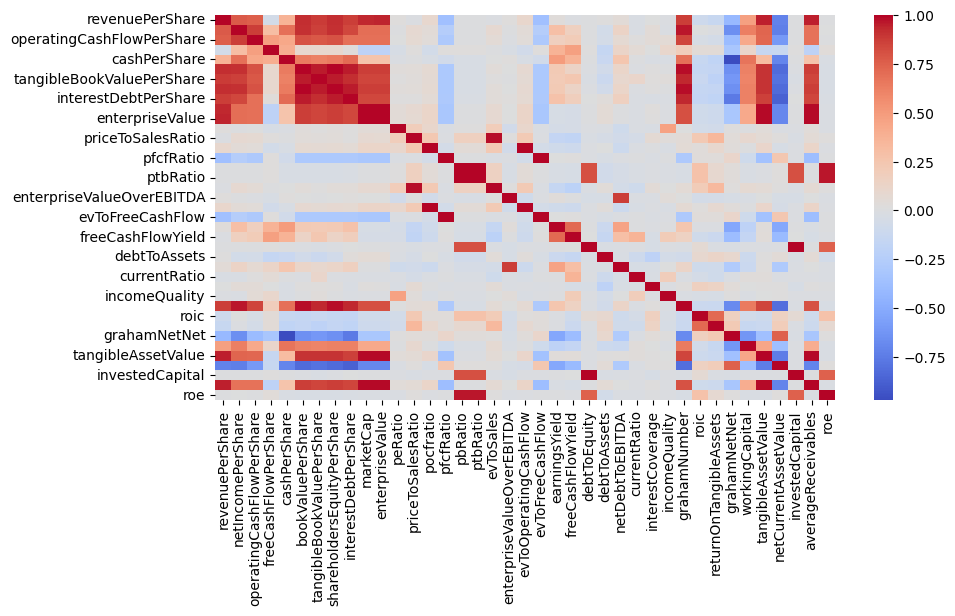

In [12]:
plt.figure(figsize=(10, 5))
sns.heatmap(filtered_data.corr(), cbar=True, annot=False, cmap='coolwarm')
plt.show()

Has code for "forward selection" method - https://medium.com/@rithpansanga/logistic-regression-for-feature-selection-selecting-the-right-features-for-your-model-410ca093c5e0#:~:text=One%20popular%20method%20is%20%E2%80%9Cforward,number%20of%20features%20is%20reached.
